Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error


In [2]:
places_df  = pd.read_csv('yelp_dup.csv')
places_df.head()

,Station Name,Business Name,Business Address,Business Latitude,Business Longitude,Distance,Category,Review Count,Rating
0,GALINDO,Duplex,"Calle Iparragirre, 1",43.307911,-3.007915,159.140086,restaurants,1,4.0
1,GALINDO,Alameda,Calle Alameda las Llanas 17,43.309331,-3.008429,27.281843,bars,1,1.0
2,GALINDO,Taberna la Venta del Casco,"C/ Gran Vía, 3 Trasera, Plaza del Orfeón",43.307983,-2.996518,69.426699,nightlife,1,3.0
3,GALINDO,Edur-Mendi,"Gran Via Kalea, 3",43.309562,-3.006886,100.769346,restaurants,3,3.5
4,GALINDO,Telepizza,Calle Villar y Villate 0,43.308707,-3.006989,113.385711,restaurants,3,3.5


In [3]:
stations_df  = pd.read_csv('station_info.csv')
stations_df.head()

,Station Name,Latitude,Longitude,No. of bikes
0,GALINDO,43.306193,-3.008859,18
1,KASKO,43.309336,-3.008092,12
2,KUETO,43.307856,-3.000458,12
3,LABE GARAIA/ALTO HORNO,43.310936,-3.000576,16


In [4]:
# Joining two DataFrames
new_df = pd.merge(stations_df, places_df, left_on = 'Station Name', right_on ='Station Name', how='left')


In [5]:
new_df.head()


,Station Name,Latitude,Longitude,No. of bikes,Business Name,Business Address,Business Latitude,Business Longitude,Distance,Category,Review Count,Rating
0,GALINDO,43.306193,-3.008859,18,Duplex,"Calle Iparragirre, 1",43.307911,-3.007915,159.140086,restaurants,1,4.0
1,GALINDO,43.306193,-3.008859,18,Alameda,Calle Alameda las Llanas 17,43.309331,-3.008429,27.281843,bars,1,1.0
2,GALINDO,43.306193,-3.008859,18,Taberna la Venta del Casco,"C/ Gran Vía, 3 Trasera, Plaza del Orfeón",43.307983,-2.996518,69.426699,nightlife,1,3.0
3,GALINDO,43.306193,-3.008859,18,Edur-Mendi,"Gran Via Kalea, 3",43.309562,-3.006886,100.769346,restaurants,3,3.5
4,GALINDO,43.306193,-3.008859,18,Telepizza,Calle Villar y Villate 0,43.308707,-3.006989,113.385711,restaurants,3,3.5


In [6]:
#save new_df to drive
new_df.to_csv('new_data.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

In [7]:
# Number of rows and columns
new_df.shape


(92, 12)

**OBSERVATION**

The data contains 92 rows and 12 columns


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station Name        92 non-null     object 
 1   Latitude            92 non-null     float64
 2   Longitude           92 non-null     float64
 3   No. of bikes        92 non-null     int64  
 4   Business Name       92 non-null     object 
 5   Business Address    92 non-null     object 
 6   Business Latitude   92 non-null     float64
 7   Business Longitude  92 non-null     float64
 8   Distance            92 non-null     float64
 9   Category            92 non-null     object 
 10  Review Count        92 non-null     int64  
 11  Rating              92 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ KB


In [9]:
#summary of statistics
new_df.describe()

,Latitude,Longitude,No. of bikes,Business Latitude,Business Longitude,Distance,Review Count,Rating
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,43.308580,-3.004496,14.500000,43.308503,-3.005094,223.123239,1.652174,2.847826
std,0.001766,0.004011,2.612312,0.002633,0.004373,248.851903,0.919087,1.052833
min,43.306193,-3.008859,12.000000,43.298945,-3.014120,27.281843,1.000000,1.000000
25%,43.307440,-3.008284,12.000000,43.307794,-3.007421,85.838965,1.000000,2.500000
50%,43.308596,-3.004334,14.000000,43.308495,-3.006822,151.270282,1.000000,3.000000
75%,43.309736,-3.000547,16.500000,43.309390,-3.002438,278.454349,2.000000,3.500000
max,43.310936,-3.000458,18.000000,43.315200,-2.996518,1116.724704,4.000000,5.000000


**OBSERVATIONS**

1. The average number of bikes per station in Sestao is 12, the minimum is 12 and the maximum is 18

2. The average number of reviews for all the POIs is 1.6, the minimum is 1 and the maximum is 5

3. The average rating of the POIs is 2.7, the minimum is 1 and the maximum is 5

In [15]:
new_df['Station Name'].value_counts() / len(new_df['Station Name'])

GALINDO                   0.25
KASKO                     0.25
KUETO                     0.25
LABE GARAIA/ALTO HORNO    0.25
Name: Station Name, dtype: float64

**OBSERVATION**

All the four stations in Sestao have equal number of entries within 1000m radius

<Axes: xlabel='Station Name', ylabel='Count'>

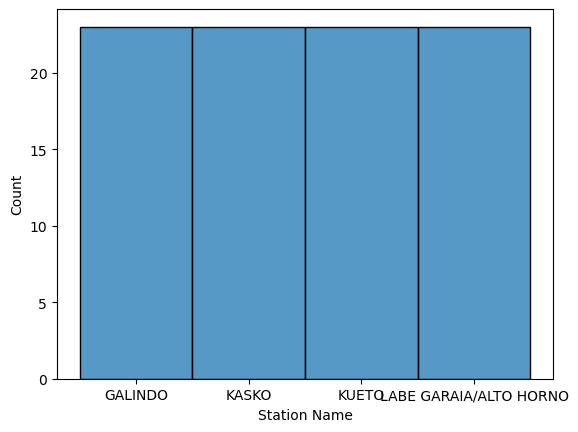

In [10]:
sns.histplot(data=new_df, x='Station Name')

**OBSERVATION**

All the stations in Sestao all have equal number of entries which means all the businesses are well within 1000m radius of each other

<Axes: xlabel='Category', ylabel='Count'>

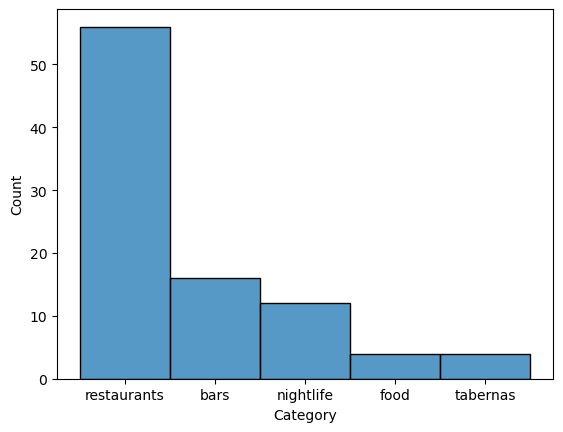

In [11]:
sns.histplot(data=new_df, x='Category')

**OBSERVATION**

It can be observed that restaurants are the major businesses in Sestao followed by bars

<Axes: xlabel='Rating', ylabel='Count'>

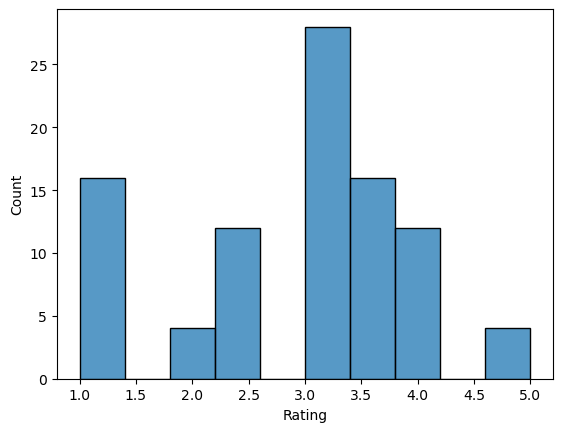

In [12]:
sns.histplot(data=new_df, x='Rating')

**OBSERVATION**

The businesses in Sestao have a mode rating of 3.0 which and lowest rating of 5.0 and 2.0. This means most of the businesses are well average

<Axes: xlabel='Review Count', ylabel='Count'>

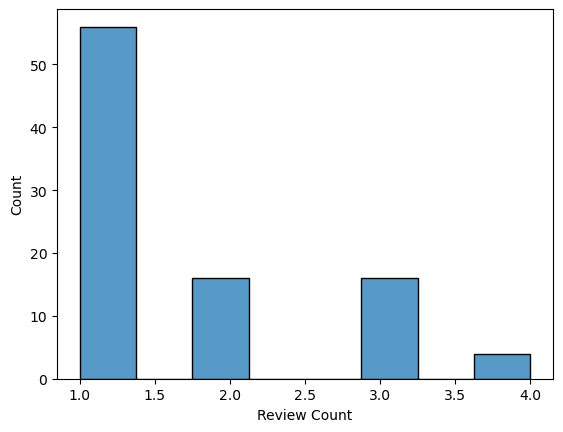

In [13]:
sns.histplot(data=new_df, x='Review Count')

**OBSERVATION**

The businesses in Sestao have very poor reviews, further evidenced by the average rating of the businesses

<Axes: xlabel='No. of bikes', ylabel='Count'>

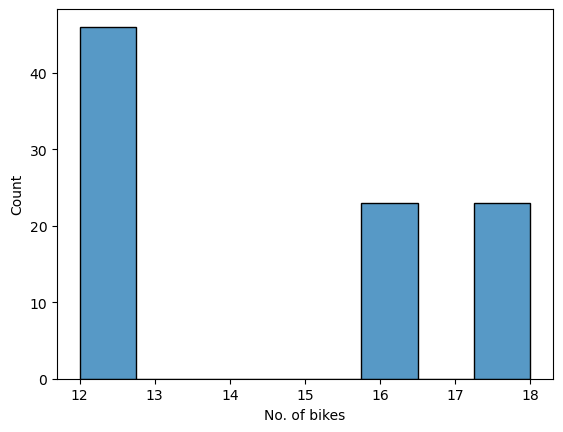

In [16]:
sns.histplot(data=new_df, x='No. of bikes')

**OBSERVATION**

The bike stations in Sestao have bikes between 12 to 18 with majority only having 12 bikes

In [23]:
tmp = new_df.drop(['Station Name', 'Business Name', 'Business Address', 'Category'], axis=1)
tmp.head()

,Latitude,Longitude,No. of bikes,Business Latitude,Business Longitude,Distance,Review Count,Rating
0,43.306193,-3.008859,18,43.307911,-3.007915,159.140086,1,4.0
1,43.306193,-3.008859,18,43.309331,-3.008429,27.281843,1,1.0
2,43.306193,-3.008859,18,43.307983,-2.996518,69.426699,1,3.0
3,43.306193,-3.008859,18,43.309562,-3.006886,100.769346,3,3.5
4,43.306193,-3.008859,18,43.308707,-3.006989,113.385711,3,3.5


In [24]:
corr = tmp.corr()
corr

,Latitude,Longitude,No. of bikes,Business Latitude,Business Longitude,Distance,Review Count,Rating
Latitude,1.000000e+00,4.997820e-01,-2.684273e-01,-1.062192e-13,-8.047147e-13,-5.171645e-13,-1.315796e-13,-2.050286e-13
Longitude,4.997820e-01,1.000000e+00,-2.531979e-01,-6.051964e-13,-3.852995e-14,-1.103395e-14,-3.413280e-16,-2.658007e-16
No. of bikes,-2.684273e-01,-2.531979e-01,1.000000e+00,2.261437e-12,2.268518e-14,-3.255008e-17,-6.402621e-17,3.074097e-16
Business Latitude,-1.062192e-13,-6.051964e-13,2.261437e-12,1.000000e+00,-2.615970e-01,-3.198282e-01,-1.714554e-02,7.121224e-02
Business Longitude,-8.047147e-13,-3.852995e-14,2.268518e-14,-2.615970e-01,1.000000e+00,-2.474609e-01,1.278063e-01,-1.281115e-01
Distance,-5.171645e-13,-1.103395e-14,-3.255008e-17,-3.198282e-01,-2.474609e-01,1.000000e+00,-1.861154e-01,2.821004e-01
Review Count,-1.315796e-13,-3.413280e-16,-6.402621e-17,-1.714554e-02,1.278063e-01,-1.861154e-01,1.000000e+00,1.718281e-01
Rating,-2.050286e-13,-2.658007e-16,3.074097e-16,7.121224e-02,-1.281115e-01,2.821004e-01,1.718281e-01,1.000000e+00


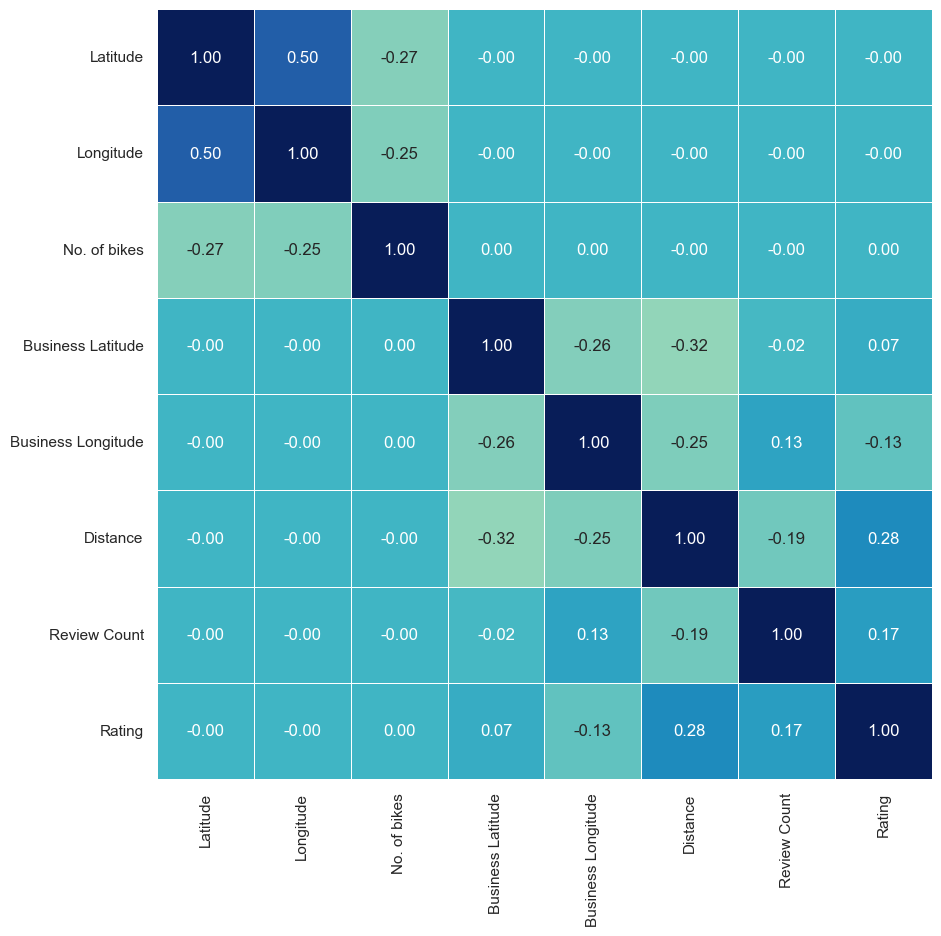

In [25]:
# Plotting correlation heatmap of the attributes
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    tmp.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

/Users/taiwooseni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


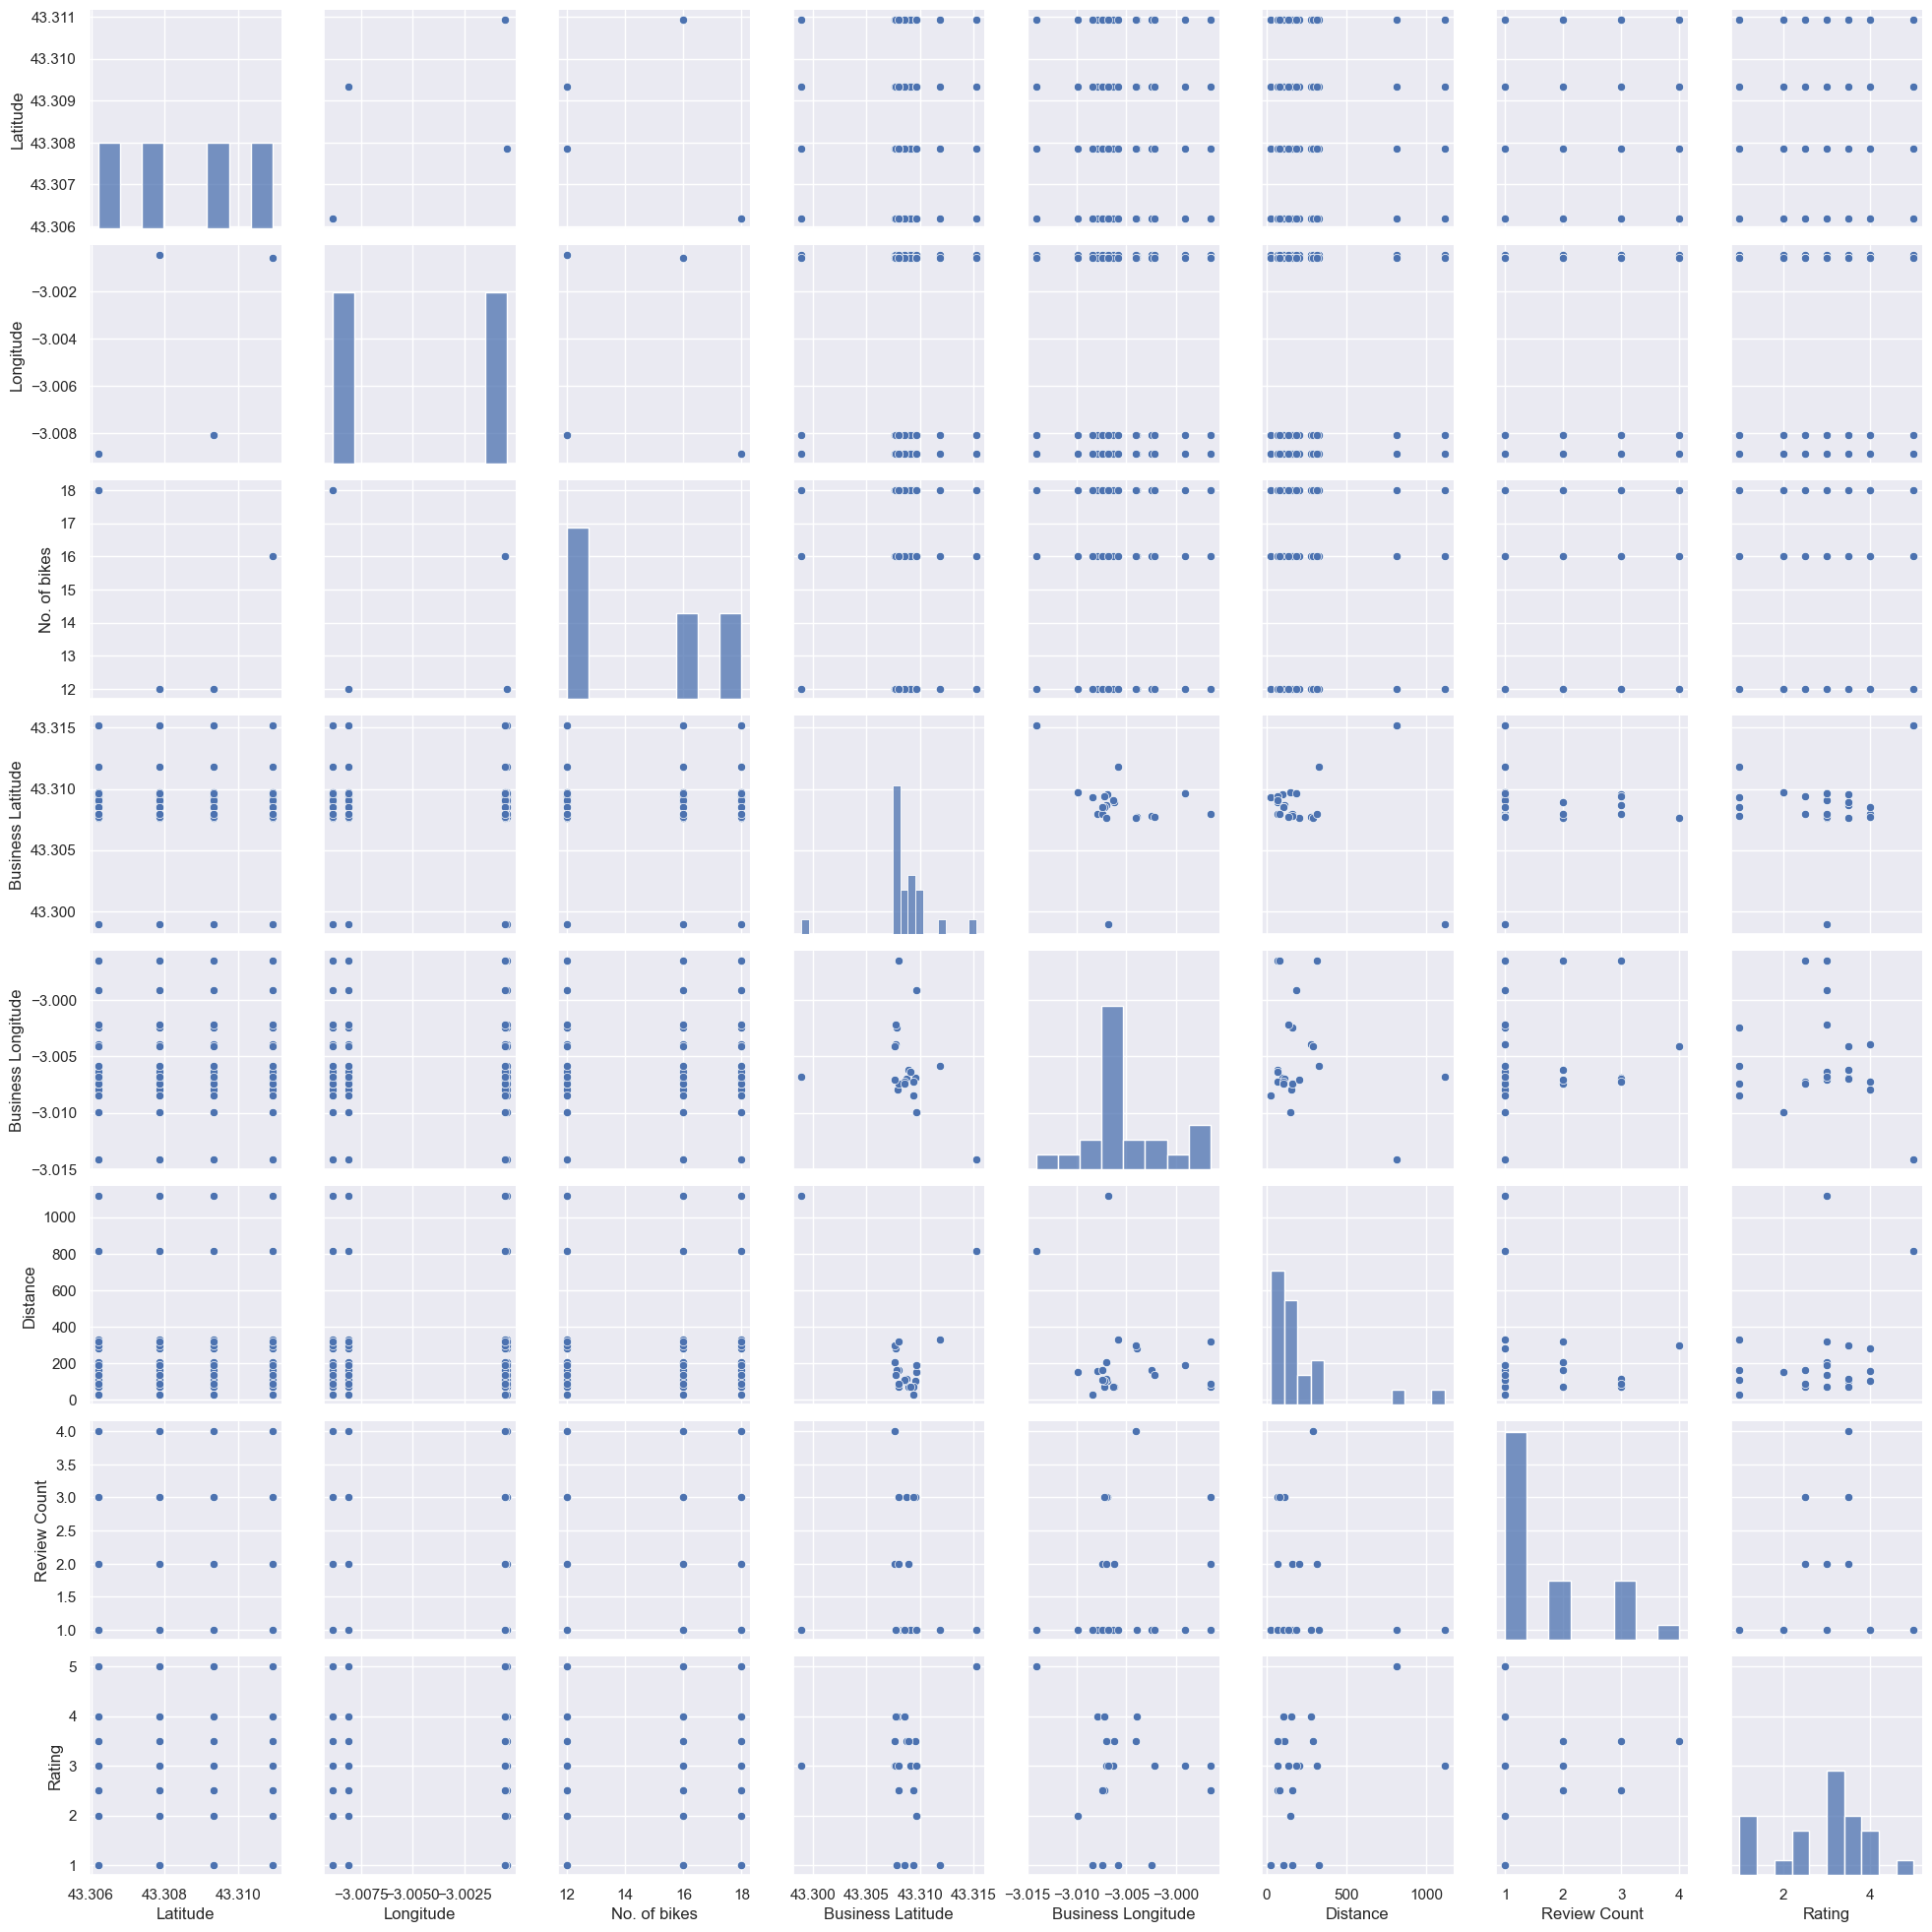

In [26]:
sns.pairplot(new_df)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [27]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [28]:
connection = create_connection("taiwo.sqlite")

Connection to SQLite DB successful


In [29]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [30]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [31]:
#creating stations table
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  Station_name TEXT NOT NULL,
  latitude FLOAT,
  longitude FLOAT,
  No_of_bikes INTEGER
);
"""

execute_query(connection, create_stations_table)

Query executed successfully


In [32]:
#create businesses table
create_bus_table = """
CREATE TABLE IF NOT EXISTS businesses (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  Station_name TEXT NOT NULL,
  Business_name TEXT NOT NULL,
  Business_address TEXT NOT NULL,
  Business_latitude FLOAT NOT NULL,
  Business_longitude FLOAT NOT NULL,
  distance FLOAT NOT NULL,
  category TEXT NOT NULL,
  Review_count INTEGER,
  rating INTEGER,
  FOREIGN KEY (Station_name) REFERENCES stations (Station_name)
);
"""

execute_query(connection, create_bus_table)

Query executed successfully


In [33]:
#insert the data into the table
places_df.to_sql('businesses', connection, if_exists='replace', index = False)


92

In [34]:
stations_df.to_sql('stations', connection, if_exists='replace', index = False)

4

Look at the data before and after the join to validate your data.

In [35]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [36]:
sql = "SELECT * from stations"
dff = pd.read_sql_query(sql, connection)
dff

,Station Name,Latitude,Longitude,No. of bikes
0,GALINDO,43.306193,-3.008859,18
1,KASKO,43.309336,-3.008092,12
2,KUETO,43.307856,-3.000458,12
3,LABE GARAIA/ALTO HORNO,43.310936,-3.000576,16


In [37]:
sql = "SELECT * from businesses"
dff2 = pd.read_sql_query(sql, connection)
dff2

,Station Name,Business Name,Business Address,Business Latitude,Business Longitude,Distance,Category,Review Count,Rating
0,GALINDO,Duplex,"Calle Iparragirre, 1",43.307911,-3.007915,159.140086,restaurants,1,4.0
1,GALINDO,Alameda,Calle Alameda las Llanas 17,43.309331,-3.008429,27.281843,bars,1,1.0
2,GALINDO,Taberna la Venta del Casco,"C/ Gran Vía, 3 Trasera, Plaza del Orfeón",43.307983,-2.996518,69.426699,nightlife,1,3.0
3,GALINDO,Edur-Mendi,"Gran Via Kalea, 3",43.309562,-3.006886,100.769346,restaurants,3,3.5
4,GALINDO,Telepizza,Calle Villar y Villate 0,43.308707,-3.006989,113.385711,restaurants,3,3.5
...,...,...,...,...,...,...,...,...,...
87,LABE GARAIA/ALTO HORNO,Oh la la,Calle Vicente Blasco Ibañez 12,43.307592,-3.004087,295.072698,restaurants,4,3.5
88,LABE GARAIA/ALTO HORNO,Hamburguesería La Estación,"Calle Vicente Blasco Ibáñez, 28",43.307716,-3.002178,135.311244,restaurants,1,3.0
89,LABE GARAIA/ALTO HORNO,Ferrara,"Plaza Casco, 1",43.307983,-2.996518,319.143395,restaurants,2,3.0
90,LABE GARAIA/ALTO HORNO,Restaurante Manhattan,Poligono Industrial Ibarzaharra 0,43.298945,-3.006822,1116.724704,restaurants,1,3.0


Joining the 2 dataframes


In [38]:
dff3 = pd.merge(dff, dff2, left_on = 'Station Name', right_on ='Station Name', how='left')
dff3.head()

,Station Name,Latitude,Longitude,No. of bikes,Business Name,Business Address,Business Latitude,Business Longitude,Distance,Category,Review Count,Rating
0,GALINDO,43.306193,-3.008859,18,Duplex,"Calle Iparragirre, 1",43.307911,-3.007915,159.140086,restaurants,1,4.0
1,GALINDO,43.306193,-3.008859,18,Alameda,Calle Alameda las Llanas 17,43.309331,-3.008429,27.281843,bars,1,1.0
2,GALINDO,43.306193,-3.008859,18,Taberna la Venta del Casco,"C/ Gran Vía, 3 Trasera, Plaza del Orfeón",43.307983,-2.996518,69.426699,nightlife,1,3.0
3,GALINDO,43.306193,-3.008859,18,Edur-Mendi,"Gran Via Kalea, 3",43.309562,-3.006886,100.769346,restaurants,3,3.5
4,GALINDO,43.306193,-3.008859,18,Telepizza,Calle Villar y Villate 0,43.308707,-3.006989,113.385711,restaurants,3,3.5
